# Project Objective

A client at analytics firm is considering opening a pizza restaurant in New York City. 

Analyse and derive insights on New York Pizza Restaurants with Above and Below Average Ratings using Yelp dataset.

![Pizza gif](https://media.giphy.com/media/eK1eFdpj5kMWqZ9bLJ/giphy.gif?cid=ecf05e47rkbp48nwz3za6dloo8xfwzueu0rx2vklguo7xyhu&rid=giphy.gif&ct=g)

## Scope 
- Read in data that has been stored as a `json` file.
- Describe how the data is structured.
- Use Python to filter a nested data structure
- Define python functions
- Calculate descriptive statistics
- Visualize data via matplotlib


## Business Understanding 

A client at analytics firm is considering opening a pizza restaurant in New York City. 

They have asked you to develop a business intelligence report to fact check the following claims:
1. Your client wants to ensure they have an above average Yelp rating. They have previously owned restuarants in other cities, where a `3` was the average. They would like to know if that holds true in New York City. 
1. Your client has noticed that restaurants on yelp with a high review count seem to be quite successful. They have decided to focus on maximizing their review count which they believe will allow them to have an above average overall review. 
1. After looking at a few restaurants on Yelp, your client believes that most above average restaurants have a price point of `$$`. They are considering increasing their prices from `$` to `$$` to match the majority of above average restaurants, and would like you to find the most common price point for above average restaurants in New York City.
1. In terms of location they have been told that above average restaurants are usually further east and below average are usually further west, but that the biggest difference is whether the restaurant is on the north or south side. They would like you to determine if the data supports this claim.
1. They believe that the `10012` zipcode in New York City is the best place to open a restaurant. They wish to open a restaurant in close proximity to other highly rated restaurants, and they believe `10012` has the most in NYC.



The primary purpose of this analysis is _descriptive_, meaning analysis is based on calculated statistics such as `counts` and `mean`, and is focused on providing a simple, factual, understanding of the data. 


## Load the data

A dataset containing information about New York pizza restaurants is stored in this notebook's repository with the name `pizza_businesses.json`.

In the cell below, json data loaded into a python list.

In [2]:
# Import the json python package
import json

# Load in the data
with open("pizza_businesses.json") as f:
    yelp_data = json.load(f)

In [3]:
print(type(yelp_data))
print(len(yelp_data))

<class 'list'>
1000


In [7]:
import pandas as pd

df = pd.DataFrame(yelp_data)
df.head(20)

,name,review_count,rating,price,location,transactions,phone,latitude,longitude
0,Prince Street Pizza,3976,4.5,\$,"{'address1': '27 Prince St', 'address2': None,...","[delivery, pickup]",+12129664100,40.723088,-73.994530
1,Juliana's,2354,4.5,\$\$,"{'address1': '19 Old Fulton St', 'address2': '...",[delivery],+17185966700,40.702747,-73.993435
2,Rubirosa,2438,4.5,\$\$,"{'address1': '235 Mulberry St', 'address2': ''...","[delivery, pickup]",+12129650500,40.722766,-73.996233
3,Lombardi's Pizza,6189,4.0,\$\$,"{'address1': '32 Spring St', 'address2': '', '...","[delivery, pickup]",+12129417994,40.721593,-73.995596
4,Lucali,1709,4.0,\$\$,"{'address1': '575 Henry St', 'address2': None,...",[delivery],+17188584086,40.681800,-74.000240
5,Roberta's,3004,4.0,\$\$,"{'address1': '261 Moore St', 'address2': '', '...","[delivery, pickup]",+17184171118,40.704930,-73.933990
6,Joe's Pizza,2673,4.0,\$,"{'address1': '7 Carmine St', 'address2': '', '...",[delivery],+12123661182,40.730555,-74.002116
7,L'industrie Pizzeria,596,4.5,\$,"{'address1': '254 S 2nd St', 'address2': '', '...",[delivery],+17185990002,40.711620,-73.957830
8,Joe's Pizza,947,4.0,\$,"{'address1': '150 E 14th St', 'address2': '', ...","[delivery, pickup]",+12123889474,40.733310,-73.987630
9,Grimaldi's Pizzeria,4683,3.5,\$\$,"{'address1': '1 Front St', 'address2': '', 'ad...","[delivery, pickup]",+17188584300,40.702583,-73.993241


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          1000 non-null   object 
 1   review_count  1000 non-null   int64  
 2   rating        1000 non-null   float64
 3   price         1000 non-null   object 
 4   location      1000 non-null   object 
 5   transactions  1000 non-null   object 
 6   phone         1000 non-null   object 
 7   latitude      1000 non-null   float64
 8   longitude     1000 non-null   float64
dtypes: float64(3), int64(1), object(5)
memory usage: 70.4+ KB


## Describe the data

Now that we've loaded in the dataset, the structure of the data can be inspected.


In [8]:
# Find the datatype for the overall dataset
dataset_type = type(yelp_data)
# Isolate the first observation
first_observation = "No null values are present."
# Find the datatype for the first observation
observation_type = "The dataset includes object, float and integer datatypes"
# How many observations are there
num_observations = "9 columns and 1000 records"

Run this following cell unchanged to print out descriptive information for the dataset!

In [9]:
from pprint import pprint

print(f'The dataset is a \033[1m{dataset_type}\033[0m')
print(f'The observations are a \033[1m{observation_type}\033[0m',)
print(f'There are \033[1m{num_observations} observations.\033[0m')
print('\033[1m\nThe first observation:\033[0m')
print('==========================================')
pprint(first_observation)
print('==========================================')

The dataset is a <class 'list'>
The observations are a The dataset includes object, float and integer datatypes
There are 9 columns and 1000 records observations.

The first observation:
'No null values are present.'


## Find the possible rating options. 

In the cell below, created a variable called `rating_options` that has a [set datatype](https://realpython.com/python-sets/), and is a unique collection of the possible ratings a restaurant can recieve.

In [8]:
# Create the `rating_options` set variable
rating_options = set()

# Loop over all of the observations in the dataset

# Isolate the rating for the restaurant
for i in df.index:
    rating_options.add(df['rating'][i])
    
rating_options

{1.0, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0}

In order to validate, below assertions can be executed

In [9]:
assert type(rating_options) == set
assert len(rating_options) == 8
assert list(rating_options)[0] != list(rating_options)[1]

## Plot the distribution for ratings

Now that we know what rating options are available, in the cell below plotted a histogram showing the distribution of ratings. 

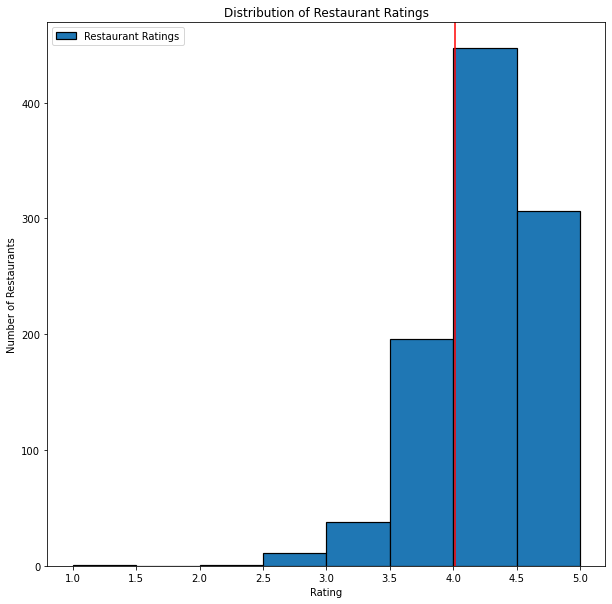

In [10]:
# Import matplotlib's pyplot module
import matplotlib.pyplot as plt
%matplotlib inline

# Create an empty list.
# We will store all ratings in this list
ratings = []

# Loop over every restaurant in the dataset
for i in df.index:
    ratings.append(df['rating'][i])

#Find the average rating
avg_rating = df['rating'].mean()

# Create a matplotlib subplot
fig, axes = plt.subplots(figsize=(10,10))

# Plot a histogram of the ratings list
axes.hist(ratings, edgecolor='black', linewidth=1.2, bins=len(list(rating_options)))
axes.legend(["Restaurant Ratings"],loc='upper left')
axes.axvline(x=avg_rating, color="red")
plt.xlabel("Rating")
plt.ylabel("Number of Restaurants")
plt.title("Distribution of Restaurant Ratings")
plt.show()

The data distribution of restaraunt ratings suggests that over 400 restaurants have rating between 4 and 4.5.
Average rating was 3 in other cities where client owned the restaurant previously but in New York city, average rating is 4.


## Isolating the restaurants with an above average rating

Now that we have an understanding for what is an average rating, next will isolate restaurants with above average and below average ratings so we can compare them.

In the cell below, filtering out all restaurants that do not have a rating of at least `4.5`.

In [32]:
# Create an empty list
# We will store restaurants in this list
above_average = []

# Loop over the dataset
for i in df.index:
    ratings = df['rating'][i]
    
    # Check if the rating is at least 4.5
    if ratings >= 4.5:
        # Add the restaurant to the list
        above_average.append(dict(df.loc[i]))

#Fetch first 2 rows
above_average[:2]

[{'name': 'Prince Street Pizza',
  'review_count': 3976,
  'rating': 4.5,
  'price': '\\$',
  'location': {'address1': '27 Prince St',
   'address2': None,
   'address3': '',
   'city': 'New York',
   'zip_code': '10012',
   'country': 'US',
   'state': 'NY',
   'display_address': ['27 Prince St', 'New York, NY 10012']},
  'transactions': ['delivery', 'pickup'],
  'phone': '+12129664100',
  'latitude': 40.72308755605564,
  'longitude': -73.99453001177575},
 {'name': "Juliana's",
  'review_count': 2354,
  'rating': 4.5,
  'price': '\\$\\$',
  'location': {'address1': '19 Old Fulton St',
   'address2': '',
   'address3': '',
   'city': 'Brooklyn',
   'zip_code': '11201',
   'country': 'US',
   'state': 'NY',
   'display_address': ['19 Old Fulton St', 'Brooklyn, NY 11201']},
  'transactions': ['delivery'],
  'phone': '+17185966700',
  'latitude': 40.70274718768062,
  'longitude': -73.99343490196397}]

In [13]:
assert type(above_average) == list
assert type(above_average[0]) == dict
assert len(above_average) == 306

## Isolating restaurants with a below average rating

Repeating the process for below average ratings.

In the cell below, isolating restaurants that have a rating of no more than `3.5`.

In [33]:
# Create an empty list
# You will store restaurants in this list
below_average = []

# Loop over the restaurants in the dataset
for i in df.index:
    ratings = df['rating'][i] 
    
    # Check if the rating is no more than 3.5
    if ratings <= 3.5:
        # Add the restaurant to the list
        below_average.append(dict(df.loc[i]))
        
#Fetch first 2 rows
below_average[:2]

[{'name': "Grimaldi's Pizzeria",
  'review_count': 4683,
  'rating': 3.5,
  'price': '\\$\\$',
  'location': {'address1': '1 Front St',
   'address2': '',
   'address3': '',
   'city': 'Brooklyn',
   'zip_code': '11201',
   'country': 'US',
   'state': 'NY',
   'display_address': ['1 Front St', 'Brooklyn, NY 11201']},
  'transactions': ['delivery', 'pickup'],
  'phone': '+17188584300',
  'latitude': 40.702583,
  'longitude': -73.9932413},
 {'name': "MAMA'S TOO!",
  'review_count': 460,
  'rating': 3.5,
  'price': '\\$\\$',
  'location': {'address1': '2750 Broadway',
   'address2': '',
   'address3': None,
   'city': 'New York',
   'zip_code': '10025',
   'country': 'US',
   'state': 'NY',
   'display_address': ['2750 Broadway', 'New York, NY 10025']},
  'transactions': ['delivery'],
  'phone': '+12125107256',
  'latitude': 40.80084,
  'longitude': -73.96766}]

In [15]:
assert type(below_average) == list
assert type(below_average[0]) == dict
assert len(below_average) == 247

## Calculate average review counts for both groups

Now that we've isolated above average and below average restaurants, we can calculate the average number of reviews received by both groups.

To do this, we will need to isolate the review counts for both groups, and calculate their average. 

The code for isolating the review counts will look very similar to previously written code, which is a good sign that a function should be defined!

In the cell below, a function called `isolate_values` is define that receives two arguments:
1. A list of dictionaries
2. A string indicating the key that should be isolated for each dictionary

This function will:
- Loop over every dictionary in the inputted list
- Pull out the value assigned to the inputted key
- Append the value to a new list
- Return the new list of values

In [16]:
def isolate_values(dictionaries, key):
    # Create an empty list
    # for storing data
    records = []
    # Loop over every dicionary 
    for i in range(0,len(dictionaries)):
        
        # Isolate the value of the dictionary with the `key`
        specific_key_value = dictionaries[i][key]
                
        # Append the value to the list
        records.append(specific_key_value)
    
    # Return the list of values
    return records

In [17]:
from types import FunctionType

assert type(isolate_values) == FunctionType
assert type(isolate_values([{'test': 1}], 'test')) == list
assert len(isolate_values([{'test': 1}], 'test')) == 1
assert len(isolate_values(above_average, 'name')) == len(above_average)
assert isolate_values(above_average, 'name')[-1] == above_average[-1]['name']

Now using the `isolate_values` function creating a list called `abv_avg_rev_cnts` that contains the review counts for every above average restaurant.

In [27]:
abv_avg_rev_cnts = isolate_values(above_average, 'review_count')
abv_avg_rev_cnts = [int(x) for x in abv_avg_rev_cnts]
abv_avg_rev_cnts[:5]

[3976, 2354, 2438, 596, 154]

Using `isolate_values` function creating a list called `blw_avg_rev_cnts` that contains the review counts for every below average restaurant.

In [28]:
blw_avg_rev_cnts = isolate_values(below_average, 'review_count')
blw_avg_rev_cnts = [int(x) for x in blw_avg_rev_cnts]
blw_avg_rev_cnts[:5]

[4683, 460, 95, 392, 550]

In [34]:
assert type(abv_avg_rev_cnts) == list
assert type(abv_avg_rev_cnts[0]) == int
assert type(blw_avg_rev_cnts) == list
assert type(blw_avg_rev_cnts[0]) == int
assert len(abv_avg_rev_cnts) == len(above_average)
assert len(blw_avg_rev_cnts) == len(below_average)
assert abv_avg_rev_cnts[101] == above_average[101]['review_count']
assert blw_avg_rev_cnts[101] == below_average[101]['review_count']

Given review counts are isolated for both groups, average review count can be calculated

But before that, lets inspect the distribution of review counts to make sure `mean` is an appropriate measure of centrality.

In the cell below, we plot a histogram for above average and below average restaurant review counts.

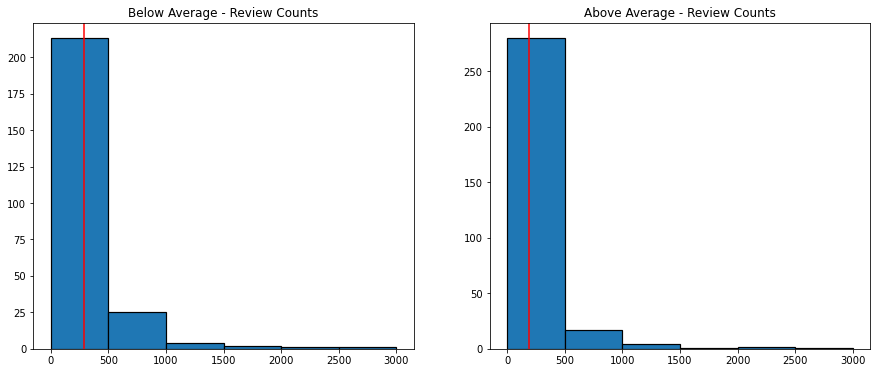

In [35]:
# Import numpy
import numpy as np 

# Initialize a matplotlib subplot
# with 1 row and 2 columns
fig, axes = plt.subplots(1,2, figsize=(15,6))

# Plot a histogram of below average review counts
# on the first axis
axes[0].hist(blw_avg_rev_cnts, edgecolor='black', linewidth=1.2, bins=[0, 500, 1000, 1500, 2000, 2500, 3000])
axes[0].axvline(x=np.mean(blw_avg_rev_cnts), color="red")

# # Set the title for the first axis
# # to "Below Average - Review Counts"
axes[0].set_title("Below Average - Review Counts")

# # Plot a histogram of above average review counts
# # on the first axis
axes[1].hist(abv_avg_rev_cnts, edgecolor='black', linewidth=1.2, bins=[0, 500, 1000, 1500, 2000, 2500, 3000])
axes[1].axvline(x=np.mean(abv_avg_rev_cnts), color="red")

# # Set the title for the first axis
# # to "Above Average - Review Counts"
axes[1].set_title("Above Average - Review Counts");

Most number of restaurants in both below and above average restaurants have received high number of review counts of around 500. In those popular review counts, above average group has more than 280 restaurants as compared to the other.
This dataset will be classified as Discrete data in statistics

In the cell below, we calculate the average review count for above average and below average restaurants.

In [36]:
# Import numpy
import numpy as np 

# Replace None with your code
abv_avg_rev_cnt_center = np.average(abv_avg_rev_cnts)
blw_avg_rev_cnt_center = np.average(blw_avg_rev_cnts)

print('Above average review count:', abv_avg_rev_cnt_center)
print('Below average review count:', blw_avg_rev_cnt_center)

Above average review count: 189.3856209150327
Below average review count: 285.99595141700405


The review count doesn't really reflect the fact that business would be successful when there is high review count value

## Count the price option frequency

The `price` variable in the dataset is a string of dollar signs indicating how expensive a restaurant's price point is. 

In the cell below, for loop that counts how frequently a given price point appears for the `above_average` dataset is written

In [37]:
# Create an empty dictionary to store the
# counts for each price point
abv_avg_prices = {}

# Loop over the above average restaurants
for i in range(0, len(above_average)):
    # Isolate the price point for the restuarant
    restaurant_price = above_average[i]['price']
    
    # Check if the price has been added to the dictionary
    if(restaurant_price in abv_avg_prices.keys()):
        # If the price is already a key in the dictionary
        # Add one to the count for that price point
        abv_avg_prices[restaurant_price] += 1
        
    # If the price has not been added to the dictionary
    # Else set the price as the key and the value as the integer `1`
    else:
        abv_avg_prices[restaurant_price] = 1

print(abv_avg_prices)

{'\\$': 74, '\\$\\$': 87, 'Unknown': 134, '\\$\\$\\$': 10, '\\$\\$\\$\\$': 1}


In [38]:
assert type(abv_avg_prices) == dict
assert len(abv_avg_prices) == 5
assert '\\$\\$\\$\\$' in abv_avg_prices

**Reapplying the same process, but instead calculate the price point frequencies for the `below_average` dataset.**

In [39]:
# Create an empty dictionary to store the
# counts for each price point
blw_avg_prices = {}

# Loop over the below average restaurants
for i in range(0, len(below_average)):
    # Isolate the price point for the restuarant
    restaurant_price = below_average[i]['price']
    
    # Check if the price has been added to the dictionary
    if(restaurant_price in blw_avg_prices.keys()):
        # If the price is already a key in the dictionary
        # Add one to the count for that price point
        blw_avg_prices[restaurant_price] += 1
        
    # If the price has not been added to the dictionary
    # Else set the price as the key and the value as the integer `1`
    else:
        blw_avg_prices[restaurant_price] = 1

blw_avg_prices

{'\\$\\$': 88, '\\$': 128, 'Unknown': 19, '\\$\\$\\$': 12}

In [40]:
assert type(blw_avg_prices) == dict
assert len(blw_avg_prices) == 4
assert '\\$' in blw_avg_prices

## Creating a bar plot that sets the frequency of each price point as the y axis

Text(0.5, 1.0, 'Above Average')

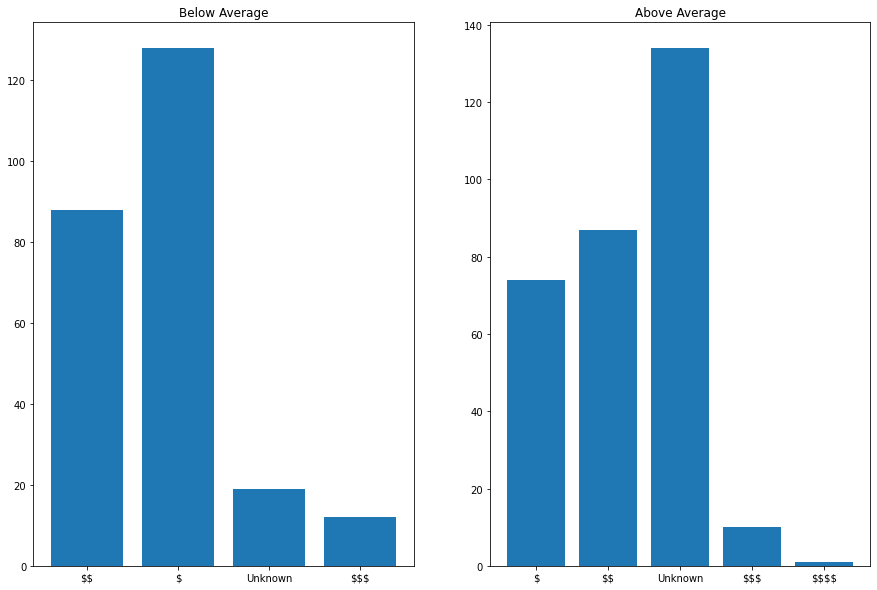

In [41]:
# Create a matplotlib subplot with 1 row and 2 columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,10))

# Isolate keys of the below average price count dictionary
# This will be the x-axis
x0 = blw_avg_prices.keys()

# Isolate the values of the below average price count dictionary
# This will be the y-axis
y0 = blw_avg_prices.values()
# y0 = sorted(blw_avg_prices.values)

# Plot the below average price point counts as a bar plot
# on the first axis
axes[0].bar(x0, y0)

# Set the title for the first axis
# to the string "Below Average"
axes[0].set_title('Below Average')

# Isolate keys of the above average price count dictionary
# This will be the x-axis
x1 = abv_avg_prices.keys()

# Isolate the values of the above average price count dictionary
# This will be the y-axis
y1 = abv_avg_prices.values()

# Plot the above average price counts as a bar plot
# on the second axis
axes[1].bar(x1, y1)

# Set the title for the second axis to 
# the string 'Above Average'
axes[1].set_title('Above Average')

Above graph illustrates that high number of above average restaurants does not have valid price points whereas below average has a common price point of `$`. Both above and below average have similar number of restaurants that has `$$` as price points. It is also important to note restaurants in below average have `$$$` which is significantly higher as compared to above average

## Analyze restaurant location

In the cell below, using `isolate_values` function to isolate `longitude` and `latitude` for above and below average restaurants.

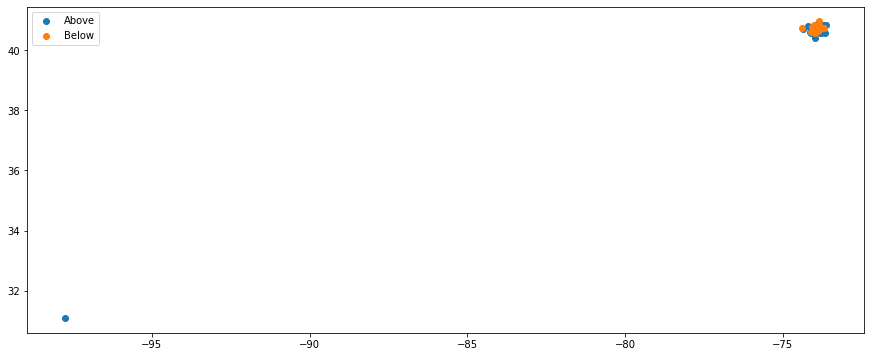

In [42]:
# Replace None with your code

# Isolate longitude for above average restaurants
abv_avg_lon = isolate_values(above_average, 'longitude')

# Isolate latitude for above average restaurants
abv_avg_lat = isolate_values(above_average, 'latitude')

# Isolate longitude for below average restaurants
blw_avg_lon = isolate_values(below_average, 'longitude')

# Isolate latitude for below average restaurants
blw_avg_lat = isolate_values(below_average, 'latitude')

plt.figure(figsize=(15,6))
plt.scatter(abv_avg_lon, abv_avg_lat, label='Above')
plt.scatter(blw_avg_lon, blw_avg_lat, label='Below')
plt.legend();

## Removing the outlier

There is one restaurant in the above average dataset with a location dramatically west and south of all other observations. Let's remove that restaurant from the above average dataset and regenerate the scatter plot.

In [43]:
# Create an empty list
# that will contain data with
# the outlier removed
no_outliers = []

# Create an empty list to append the outlier
outlier = []

# Loop over every restaurant in the above average dataset
for i in range(0, len(above_average)):
    
    # Isolate the restaurant's longitude
    restaurant_longitude = above_average[i]['longitude']

    # Check if the longitude value is greater than the integer -90
    if restaurant_longitude > -90:
        # Append the restaurant to the no_outliers list
        no_outliers.append(above_average[i])
        
    # If longitude is less than -90 it is an outlier
    # and should be appended to the outlier list
    else:
        outlier.append(above_average[i])
outlier

[{'name': 'New York Pizza',
  'review_count': 115,
  'rating': 4.5,
  'price': '\\$\\$',
  'location': {'address1': '701 W Elms Rd',
   'address2': 'Ste 300',
   'address3': '',
   'city': 'Killeen',
   'zip_code': '76542',
   'country': 'US',
   'state': 'TX',
   'display_address': ['701 W Elms Rd', 'Ste 300', 'Killeen, TX 76542']},
  'transactions': ['delivery'],
  'phone': '+12542851758',
  'latitude': 31.086427,
  'longitude': -97.753939}]

In [44]:
assert type(no_outliers) == list
assert type(outlier) == list
assert len(no_outliers) == len(above_average) - 1
assert len(outlier) == 1

Now regenerating the longitude and latitude for above average restaurants using the `no_outliers` dataset, and regenerate the scatter plot!

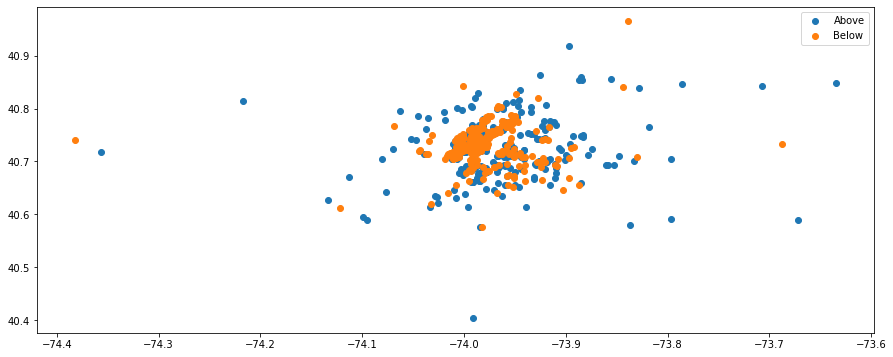

In [45]:
abv_avg_lon = isolate_values(no_outliers, 'longitude')
abv_avg_lat = isolate_values(no_outliers, 'latitude')


plt.figure(figsize=(15,6))
plt.scatter(abv_avg_lon, abv_avg_lat, label='Above')
plt.scatter(blw_avg_lon, blw_avg_lat, label='Below')
plt.legend();

## Plot the distribution of latitude and longitude

To get a better sense about how latitude and longitude are working, in the cell below plotting histograms for latitude and longitude.

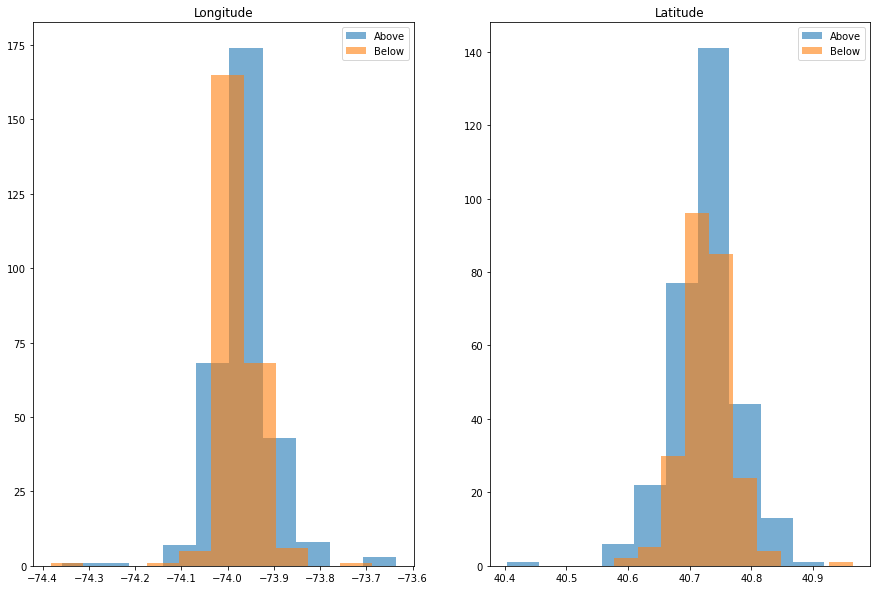

In [46]:
# Create a matplotlib subplot with 1 row and 2 columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))

# Plot a histogram of above average longitude
# on the first subplot axis. Set alpha to .6
# Set label to the string "Above"
axes[0].hist(abv_avg_lon, alpha=0.6, label='Above')
axes[0].legend()

# Plot a histogram of below average longitude
# on the first subplot axis. Set alpha to .6
# Set label to the string "Below"
axes[0].hist(blw_avg_lon, alpha=0.6, label='Below')
axes[0].legend()


# Set the title for the first subplot axis
# to the string "Longitude"
axes[0].set_title('Longitude')

# Plot a histogram of above average latitude
# on the second subplot axis. Set alpha to .6
# Set label to the string "Above"
axes[1].hist(abv_avg_lat, alpha=0.6, label='Above')
axes[1].legend()


# Plot a histogram of below average latitude
# on the second subplot axis. Set alpha to .6
# Set label to the string "Below"
axes[1].hist(blw_avg_lat, alpha=0.6, label='Below')
axes[1].legend()

# Set the title for the second subplot axis
# to the string "Latitude"
axes[1].set_title('Latitude')

plt.show()

Most of the above average restaurants are located in the latitude of 40.75

## Most common zipcode for above average restaurants

In the cell below, looping over the restaurants in the above average dataset and count the frequency of the restaurants zipcode.

In [52]:
# Create an empty dictionary
# This dictionary will hold the counts
# for each zipcode
abv_avg_zip_cnts = {}

# Loop over the above average dataset
for i in range(0, len(above_average)):
    
    # Isolate the restaurant's zipcode 
    address = above_average[i]['location']
    zipcode = address['zip_code']
    
    # Check if the zipcode is a key in the dictionary
    if(zipcode in abv_avg_zip_cnts.keys()):
        # Add one to the zipcode's value
        abv_avg_zip_cnts[zipcode] += 1
    
    # If the zipcode is not a key
    # add it to the dictionary with a value of 1
    else:
        abv_avg_zip_cnts[zipcode] = 1

#Fetch Top 5 rows
list(abv_avg_zip_cnts.items())[:5]

[('10012', 10), ('11201', 8), ('11211', 11), ('11209', 4), ('10028', 1)]

In [53]:
assert type(abv_avg_zip_cnts) == dict
assert len(abv_avg_zip_cnts) == 104 or len(abv_avg_zip_cnts) == 103
assert '10012' in abv_avg_zip_cnts

In [54]:
# Find the zipcode with largest count
max_zipcode = max(abv_avg_zip_cnts, key=abv_avg_zip_cnts.get)
max_zipcode

'10014'

10014 is the Zipcode with most restaurants. 11121, 10012 and 10003 are in the next rank with most retaurants. 

## Compiling the findings to a report

Business Intelligence report to assist client claims in opening a pizza restaurant in New York City. 

1. The data distribution of restaraunt ratings suggests that over 400 restaurants have rating between 4 and 4.5 and average rating in New York City is 4. Hence new business would be recommended to follow the same rating if they have to maintain in high performing group of restuarants

2. Comparing review counts for both below and above average restaurants, there appears similarity between these two ranges.However above average restaurants does have higher number of restaurants with more review counts.

3. Both above and below average have similar number of restaurants that has `$$` as price points. Hence client should consider increasing their price points to `$$` in order to match the majority of restaurants. It is also important to note restaurants in below average have `$$$` which is significantly higher as compared to above average

4. Based on the location comparison, most of above average restaurants are located on the North West. In addition to that, siginificant below avergae restaurants are situated on the West side too.

5. 10014 is the Zipcode with most restaurants. 11121, 10012 and 10003 are in the next rank with most retaurants. 